In [1]:
import os
import json
import pandas as pd
import seaborn as sb
from matplotlib import pyplot as plt, rcParams

In [2]:
coverage = {
    "year": [],
    "code_coverage": [],
    "function_coverage": [],
    "commit_sha": [],
}

def compute_percentage(coverage_dict: dict) -> float:
    res = 0
    for value in coverage_dict:
        res += float(coverage_dict[value])
    return res / len(coverage_dict)

for file in os.scandir("data/CodeCoverage"):
    if file.is_file and file.name == "coverage.json":
        data_file = open(file)
        data_file = json.load(data_file)
        print(data_file)
        for key in data_file:
            precen_line = round(compute_percentage(data_file[key]["LineCoverage"]), 2)
            precen_func = round(compute_percentage(data_file[key]["FuncCoverage"]), 2)
            year, month, commit = key.split("_", maxsplit=2)
            coverage["year"].append(year)
            coverage["commit_sha"].append(commit)
            coverage["code_coverage"].append(precen_line)
            coverage["function_coverage"].append(precen_func)
coverage = pd.DataFrame(coverage)

coverage

{'2012_Jun_3b62de3': {'LineCoverage': {'SRC': '66.1'}, 'FuncCoverage': {'SRC': '71.7'}}, '2015_Jul_67bd7d4': {'LineCoverage': {'SRC': '48.9'}, 'FuncCoverage': {'SRC': '64.5'}}, '2016_Sep_c23ead2': {'LineCoverage': {'SRC': '48.5'}, 'FuncCoverage': {'SRC': '63.5'}}, '2017_Jun_7ab96cc': {'LineCoverage': {'SRC': '58.6'}, 'FuncCoverage': {'SRC': '68.2'}}, '2018_Jun_a704d87': {'LineCoverage': {'ODIN_II/SRC': '75.8', 'ODIN_II/SRC/DEBUG_TOOLS': '0.0\xa0', 'ODIN_II/SRC/PARSE_TOOL': '53.3', 'ODIN_II/SRC/SIM_TOOLS': '58.8', 'ODIN_II/SRC/STRING_HASH_TOOL': '87.9', 'ODIN_II/SRC/lib_ast': '44.0', 'ODIN_II/SRC/lib_blif': '78.0', 'ODIN_II/SRC/lib_blocks': '57.4', 'ODIN_II/SRC/lib_netlist': '72.9'}, 'FuncCoverage': {'ODIN_II/SRC': '74.4', 'ODIN_II/SRC/DEBUG_TOOLS': '0.0\xa0', 'ODIN_II/SRC/PARSE_TOOL': '57.7', 'ODIN_II/SRC/SIM_TOOLS': '65.0', 'ODIN_II/SRC/STRING_HASH_TOOL': '66.7', 'ODIN_II/SRC/lib_ast': '53.2', 'ODIN_II/SRC/lib_blif': '92.7', 'ODIN_II/SRC/lib_blocks': '72.2', 'ODIN_II/SRC/lib_netlist':

,year,code_coverage,function_coverage,commit_sha
0,2012,66.10,71.70,3b62de3
1,2015,48.90,64.50,67bd7d4
2,2016,48.50,63.50,c23ead2
3,2017,58.60,68.20,7ab96cc
4,2018,58.68,62.52,a704d87
5,2019,62.50,76.00,b8b04e3
6,2020,74.90,80.10,bb51a8b
7,2021,77.20,82.60,827170f
8,2022,63.50,70.30,a6538ac


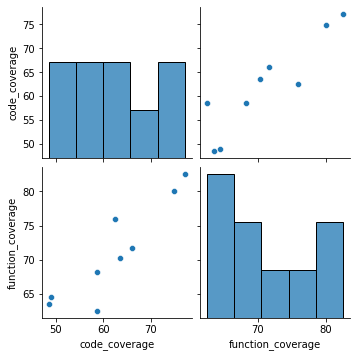

In [3]:
sb.pairplot(data=coverage)

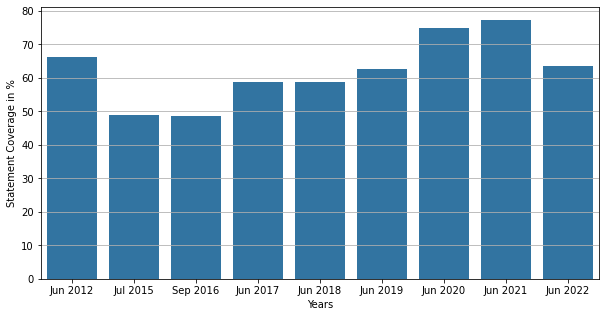

In [4]:
horizontal_labels = ["Jun 2012",
                     "Jul 2015",
                     "Sep 2016",
                     "Jun 2017",
                     "Jun 2018",
                     "Jun 2019",
                     "Jun 2020",
                     "Jun 2021",
                     "Jun 2022"]
fig, axes = plt.subplots(1, 1, figsize=(10, 5))
sb.barplot(x="year", y="code_coverage", data=coverage, ax=axes, color="tab:blue")
axes.set_ylabel("Statement Coverage in %")
#axes.set_title("Statement Coverage in ODIN_II")
axes.grid(visible=True, axis="y")
axes.set_xlabel("Years")
axes.set_xticklabels(horizontal_labels)
fig.savefig("figures/Coverage/11_year_vs_statement_coverage.svg", format='svg', dpi=1200)

In [5]:
coverage_per_file = {
    "year": [],
    "code_coverage": [],
    "function_coverage": [],
    "commit_sha": [],
    "file_name": [],
}

for file in os.scandir("data/CodeCoverage"):
    if file.is_file and file.name == "coverage_per_file.json":
        data_file = open(file)
        data_file = json.load(data_file)
        print(data_file)
        for key in data_file:
            for filename in data_file[key]["LineCoverage"]:
                coverage_per_file["code_coverage"].append(data_file[key]["LineCoverage"][filename])

            for filename in data_file[key]["FuncCoverage"]:
                coverage_per_file["function_coverage"].append(data_file[key]["FuncCoverage"][filename])
                coverage_per_file["file_name"].append(filename)
                year, month, commit = key.split("_", maxsplit=2)
                coverage_per_file["year"].append(year)
                coverage_per_file["commit_sha"].append(commit)

for liste in coverage_per_file:
    print(f"{liste}: {len(coverage_per_file[liste])}")
coverage_per_file = pd.DataFrame(coverage_per_file)

coverage_per_file

{'2012_Jun_3b62de3': {'LineCoverage': {'activity_estimation.c': '0.0\xa0', 'ast_optimizations.c': '74.5', 'ast_util.c': '84.0', 'errors.c': '0.0\xa0', 'hard_blocks.c': '73.5', 'hashtable.c': '80.6', 'high_level_data.c': '0.0\xa0', 'implicit_memory.c': '80.7', 'memories.c': '95.1', 'multipliers.c': '48.9', 'netlist_check.c': '0.9\xa0', 'netlist_create_from_ast.c': '84.5', 'netlist_optimizations.c': '100.', 'netlist_stats.c': '0.0\xa0', 'netlist_utils.c': '72.6', 'netlist_visualizer.c': '0.0\xa0', 'node_creation_library.c': '78.9', 'odin_ii.c': '68.6', 'odin_util.c': '72.0', 'output_blif.c': '76.7', 'output_graphcrunch_format.c': '0.0\xa0', 'outputs.c': '100.', 'parse_making_ast.c': '58.9', 'partial_map.c': '90.3', 'print_netlist.c': '0.0\xa0', 'queue.c': '81.6', 'read_blif.c': '82.8', 'read_xml_config_file.c': '0.0\xa0', 'simulate_blif.c': '71.2', 'string_cache.c': '93.3', 'verilog_bison.c': '63.4', 'verilog_bison.y': '74.3', 'verilog_flex.c': '43.4', 'verilog_flex.l': '50.6', 'verilog_

,year,code_coverage,function_coverage,commit_sha,file_name
0,2012,0.0,0.0,3b62de3,activity_estimation.c
1,2012,74.5,100.,3b62de3,ast_optimizations.c
2,2012,84.0,94.4,3b62de3,ast_util.c
3,2012,0.0,0.0,3b62de3,errors.c
4,2012,73.5,80.0,3b62de3,hard_blocks.c
...,...,...,...,...,...
317,2022,85.0,83.3,a6538ac,read_xml_config_file.cpp
318,2022,75.0,83.3,a6538ac,scope_util.cpp
319,2022,62.7,80.3,a6538ac,simulate_blif.cpp
320,2022,82.6,70.0,a6538ac,string_cache.cpp


In [6]:
# convert coverage to float

coverage_per_file["code_coverage"] = [float(coverage) for coverage in coverage_per_file["code_coverage"]]
coverage_per_file["function_coverage"] = [float(coverage) if coverage != "-" else 0.0 for coverage in coverage_per_file["function_coverage"]]

coverage_per_file.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 322 entries, 0 to 321
Data columns (total 5 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   year               322 non-null    object 
 1   code_coverage      322 non-null    float64
 2   function_coverage  322 non-null    float64
 3   commit_sha         322 non-null    object 
 4   file_name          322 non-null    object 
dtypes: float64(2), object(3)
memory usage: 12.7+ KB


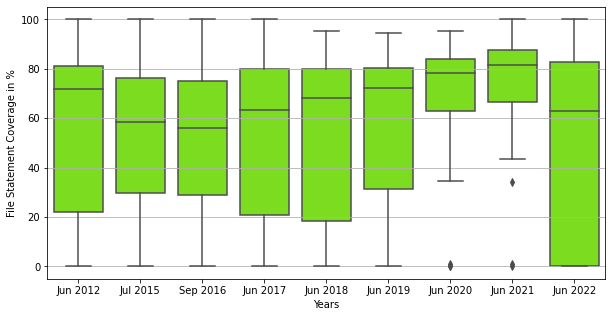

In [13]:
horizontal_labels = ["Jun 2012",
                     "Jul 2015",
                     "Sep 2016",
                     "Jun 2017",
                     "Jun 2018",
                     "Jun 2019",
                     "Jun 2020",
                     "Jun 2021",
                     "Jun 2022"]
fig, axes = plt.subplots(1, 1, figsize=(10, 5))
sb.boxplot(x="year", y="code_coverage", data=coverage_per_file, ax=axes, color="lawngreen")
axes.set_ylabel("File Statement Coverage in %")
#axes.set_title("Statement coverage per source file")
axes.grid(visible=True, axis="y")
axes.set_xlabel("Years")
axes.set_xticklabels(horizontal_labels)
fig.savefig("figures/Coverage/12_year_vs_file_statement_coverage.svg", format='svg', dpi=1200)

In [8]:
import numpy as np
def norm_gini(x):
    total = 0
    x = np.array(x)
    for i, xi in enumerate(x[:-1], 1):
        total += np.sum(np.abs(xi - x[i:]))
    g = total / (len(x)**2 * np.mean(x))
    return (len(x) * g) / (len(x) - 1)

norm_gini(coverage_per_file[coverage_per_file["year"] == "2012"]["code_coverage"].values)

0.34560654943622343

<AxesSubplot:xlabel='year', ylabel='function_coverage'>

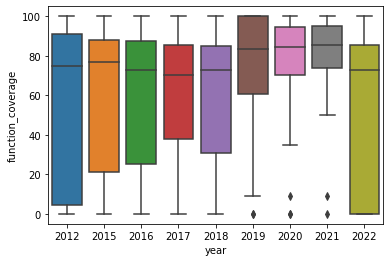

In [9]:
sb.boxplot(x="year", y="function_coverage", data=coverage_per_file)

In [10]:
coverage_per_file.groupby("year").describe()

code_coverage                                                           \
             count       mean        std  min     25%    50%     75%    max   
year                                                                          
2012          35.0  56.208571  35.783387  0.0  22.150  72.00  81.150  100.0   
2015          40.0  51.490000  33.071111  0.0  29.600  58.35  76.150  100.0   
2016          41.0  50.690244  32.995104  0.0  28.900  56.20  75.200  100.0   
2017          36.0  52.477778  35.098776  0.0  20.975  63.25  79.925  100.0   
2018          30.0  53.596667  34.249304  0.0  18.300  68.30  79.850   95.1   
2019          29.0  58.696552  32.175839  0.0  31.300  72.10  80.500   94.5   
2020          30.0  67.640000  26.995282  0.0  62.950  78.35  84.100   95.4   
2021          32.0  73.278125  24.195477  0.0  66.475  81.55  87.750  100.0   
2022          49.0  49.710204  37.583187  0.0   0.000  63.00  82.900  100.0   

     function_coverage                                                     \
                 count       mean        std  min     25%    50%      75%   
year                                                                        
2012              35.0  56.371429  39.780571  0.0   4.550  75.00   90.900   
2015              40.0  58.077500  38.439446  0.0  21.025  76.65   87.850   
2016              41.0  57.360976  38.112104  0.0  25.000  72.70   87.500   
2017              36.0  59.063889  35.599199  0.0  38.050  70.10   85.250   
2018              30.0  60.916667  34.405634  0.0  31.025  72.60   85.100   
2019              29.0  72.648276  32.911479  0.0  60.700  83.60  100.000   
2020              30.0  74.633333  29.306753  0.0  70.350  84.45   94.475   
2021              32.0  79.059375  24.891531  0.0  73.750  85.45   95.250   
2022              49.0  54.840816  39.928879  0.0   0.000  72.70   85.700   

             
        max  
year         
2012  100.0  
2015  100.0  
2016  100.0  
2017  100.0  
2018  100.0  
2019  100.0  
2020  100.0  
2021  100.0  
2022  100.0

<AxesSubplot:xlabel='code_coverage', ylabel='Count'>

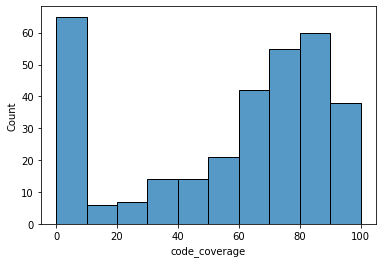

In [11]:
sb.histplot(x="code_coverage", data=coverage_per_file)

<AxesSubplot:xlabel='code_coverage', ylabel='Count'>

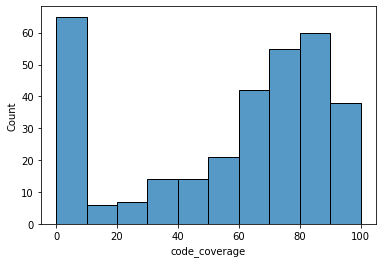

In [12]:
sb.histplot(x="code_coverage", data=coverage_per_file)